<a href="https://colab.research.google.com/github/anilbhatt-DataAnalyst/Hotel_Booking_Analysis/blob/main/From_Scratch_EDA_Hotel_Booking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [52]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15


### <b> Mounting the Google Drive

In [53]:
from google.colab import drive     
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# hotel_df_excel = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis - Anil Bhatt/Hotel Bookings.xlsx')

In [55]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis - Anil Bhatt/hotel_bookings.csv')

## <b> Data Understanding

In [56]:
print(f'We have {hotel_df.shape[1]} Variables (Columns) and {hotel_df.shape[0]} Observations (Rows)')

We have 32 Variables (Columns) and 119390 Observations (Rows)


#### We have 32 COLUMNS in the Hotel DataFrame and 1,19,390 ROWS.

#### Columns_Names are mentioned below

In [57]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [58]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [59]:
hotel_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [60]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [61]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [62]:
hotel_df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### After removing duplicate ROWS, we got 87,396 Rows.

#### This means original Hotel DataFrame had 31,994 Duplicate Rows.

#### Storing the DataFrame with duplicate values in new variable, "dropped_hotel_df".

In [63]:
dropped_hotel_df = hotel_df.drop_duplicates()

In [64]:
hotel_df = hotel_df.drop_duplicates()

#### Now the DataFrame has dupliated values removed!

In [65]:
hotel_df.shape

(87396, 32)

### MVT (Missing Value Treatment)

In [66]:
(1-hotel_df.count()/87396)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

#### <b> "company" column has approx 94% missing values, while "agent" column has approx 14% missing values.

In [67]:
null_hotel_df = hotel_df.dropna()

In [68]:
print(null_hotel_df[['company', 'agent']])

        company  agent
2392      113.0  240.0
2697      281.0  185.0
2867      281.0  334.0
2877      281.0  328.0
2878      281.0  326.0
...         ...    ...
112499    478.0    9.0
113046    148.0  290.0
113082    148.0  290.0
113627    229.0   14.0
116451    421.0    9.0

[189 rows x 2 columns]


In [69]:
hotel_df.shape

(87396, 32)

In [70]:
# hotel_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:5]
hotel_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:4]

,Column_Names,Counts
0,company,82137
1,agent,12193
2,country,452
3,children,4


In [71]:
null_columns = hotel_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:4]['Column_Names']
null_columns

0     company
1       agent
2     country
3    children
Name: Column_Names, dtype: object

In [72]:
hotel_df[null_columns]

,company,agent,country,children
0,NaN,NaN,PRT,0.0
1,NaN,NaN,PRT,0.0
2,NaN,NaN,GBR,0.0
3,NaN,304.0,GBR,0.0
4,NaN,240.0,GBR,0.0
...,...,...,...,...
119385,NaN,394.0,BEL,0.0
119386,NaN,9.0,FRA,0.0
119387,NaN,9.0,DEU,0.0
119388,NaN,89.0,GBR,0.0


In [73]:
hotel_df_new = hotel_df.drop(columns = ['company'], axis = 1)

In [74]:
hotel_df_new.shape

(87396, 31)

In [75]:
hotel_df_new['country'][hotel_df_new['country'].isnull()].reset_index().head(3)

,index,country
0,30,NaN
1,4127,NaN
2,7092,NaN


In [76]:
hotel_df_new['agent'].fillna(0,inplace=True)
hotel_df_new['children'].fillna(0,inplace=True)

In [77]:
hotel_df_new['country'].fillna('NO_COUNTRY!',inplace=True)

In [78]:
hotel_df_new.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'Column_Names', 0: 'Counts'})[0:4]

,Column_Names,Counts
0,hotel,0
1,is_repeated_guest,0
2,reservation_status,0
3,total_of_special_requests,0


#### Adding New Columns

In [79]:
hotel_df_new['total_guests'] = hotel_df_new['adults'] + hotel_df_new['babies'] + hotel_df_new['children']
hotel_df_new['total_duration_of_stay'] = hotel_df_new['stays_in_weekend_nights'] + hotel_df_new['stays_in_week_nights']

In [80]:
hotel_df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_guests',
       'total_duration_of_stay'],
      dtype='object')

#### Outlier Treatment

In [81]:
# Numeric Columns
numeric_columns = hotel_df_new[['previous_cancellations','previous_bookings_not_canceled','lead_time','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_duration_of_stay','total_guests','total_of_special_requests']]

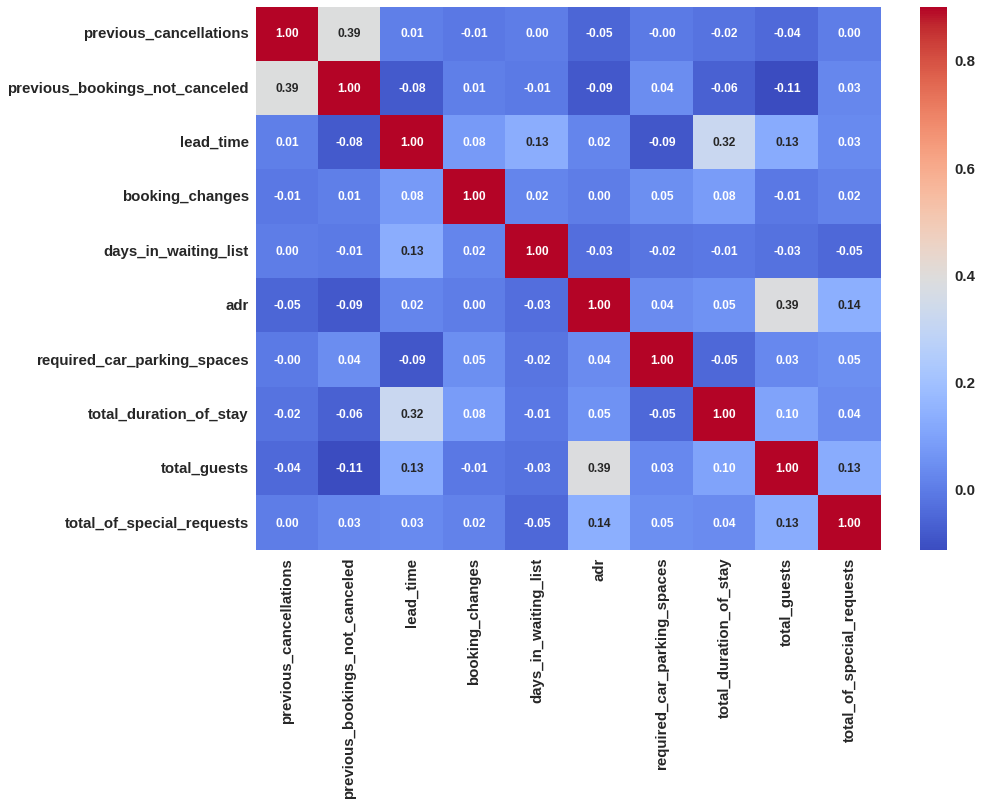

In [82]:
# Finding the relationship between numerical columns, technically called, CORRELATION
co_relation_matrix = numeric_columns.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(co_relation_matrix, fmt='.2f',cmap='coolwarm',annot = True, annot_kws={'size': 12},  vmax = .9 )

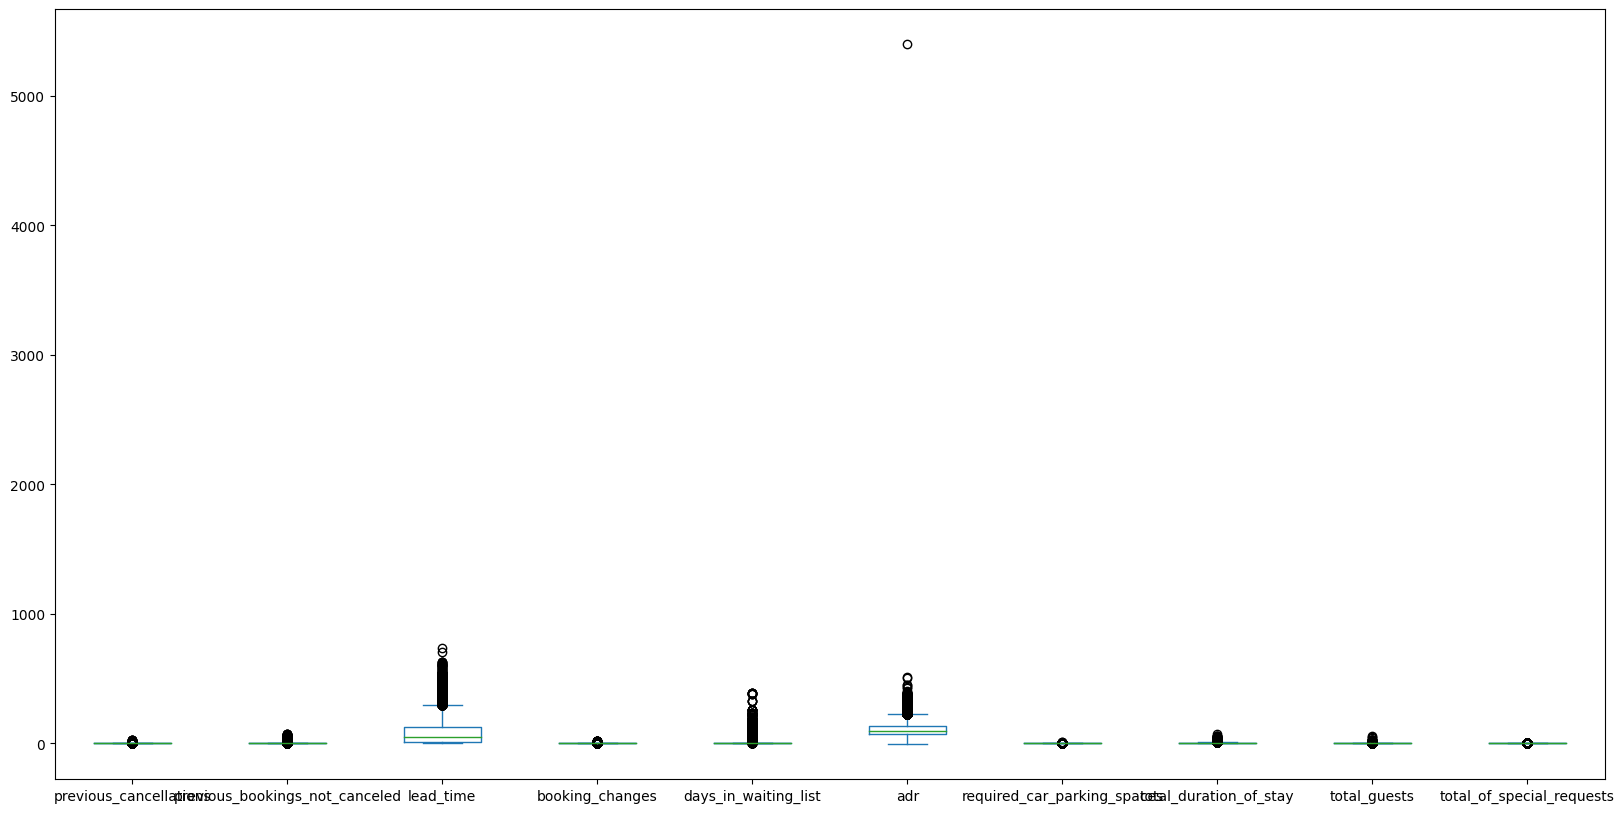

In [83]:
# Outlier Identification
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
numeric_columns.plot(kind = 'box')

In [84]:
# Removing the outlier

hotel_df_new.drop(hotel_df_new[hotel_df_new['adr'] > 5000].index, inplace = True)

In [85]:
hotel_df_new.shape

(87395, 33)

### <b> EDA (Exploratory DATA Analysis)

#### <b> Exploration 1: 
##### <b> From Business point of view one of the crucial questions is finding how bookings were done and also the number of bookings that were cancelled?

In [86]:
total_registered_hotels = hotel_df_new.pivot_table(index = 'hotel', values = 'is_canceled', aggfunc = 'count')
total_registered_hotels.reset_index().rename(columns = {'is_canceled': 'Registered_Hotels'})

,hotel,Registered_Hotels
0,City Hotel,53427
1,Resort Hotel,33968


In [87]:
total_booked_hotels = hotel_df_new[hotel_df_new.is_canceled == 0].pivot_table(index = 'hotel', values = 'is_canceled', aggfunc = 'count')
total_booked_hotels.reset_index().rename(columns = {'is_canceled': 'Booked_Hotels'})

,hotel,Booked_Hotels
0,City Hotel,37379
1,Resort Hotel,25992


In [88]:
total_canceled_hotels = hotel_df_new[hotel_df_new.is_canceled == 1].pivot_table(index = 'hotel', values = 'is_canceled', aggfunc = 'count')
total_canceled_hotels.reset_index().rename(columns = {'is_canceled': 'Canceled_Hotels'})

,hotel,Canceled_Hotels
0,City Hotel,16048
1,Resort Hotel,7976


In [89]:
percent_booked_hotels = ((total_booked_hotels/total_registered_hotels) * 100)
percent_booked_hotels.reset_index().rename(columns = {'hotel': 'Hotel_Type', 'is_canceled': 'Percent_of_Successful_Bookings '})

,Hotel_Type,Percent_of_Successful_Bookings
0,City Hotel,69.962753
1,Resort Hotel,76.519077


In [90]:
percent_canceled_hotels = (total_canceled_hotels/total_registered_hotels) * 100
percent_canceled_hotels.reset_index().rename(columns = {'hotel': 'Hotel_Type', 'is_canceled': 'Percent_of_Canceled_Bookings '})

,Hotel_Type,Percent_of_Canceled_Bookings
0,City Hotel,30.037247
1,Resort Hotel,23.480923


#### <b> Inference 1:

##### <b> (i) Around 70% of the Bookings was successful for City Hotels, while around 30% of the bookings were Cancelled.

##### <b> (ii) For Resort Hotel, around 77% Bookings were Successful, while 23% bookings were Cancelled for Resort Hotels.

In [91]:
# ***********************************************************************************************************************************************************
# ***********************************************************************************************************************************************************
# ***********************************************************************************************************************************************************
# ***********************************************************************************************************************************************************

#### <b> Exploration 2:

##### <b> Is there any trend between"Meal Type" and the "Total Guests" who booked in the hotel?

In [92]:
hotel_df_new.pivot_table(index = 'hotel', columns = 'meal', values = 'total_guests', aggfunc = 'sum')

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,84019.0,21.0,6030.0,17613.0,NaN
Resort Hotel,53654.0,798.0,13777.0,140.0,945.0


#### <b> Inference 2:
##### <b> As obvious from the summary above, MAJORITY of the guests who booked room in the hotel, preferred "BB", which probably could be just breakfast in the meal.

##### <b> This means going forward, hotel can try, as a pilot project, to eliminate "FB", which has low significance overall.

#### <b> Exploration 3:

##### <b> Is there any preferance for the "Reserved Room Type"?

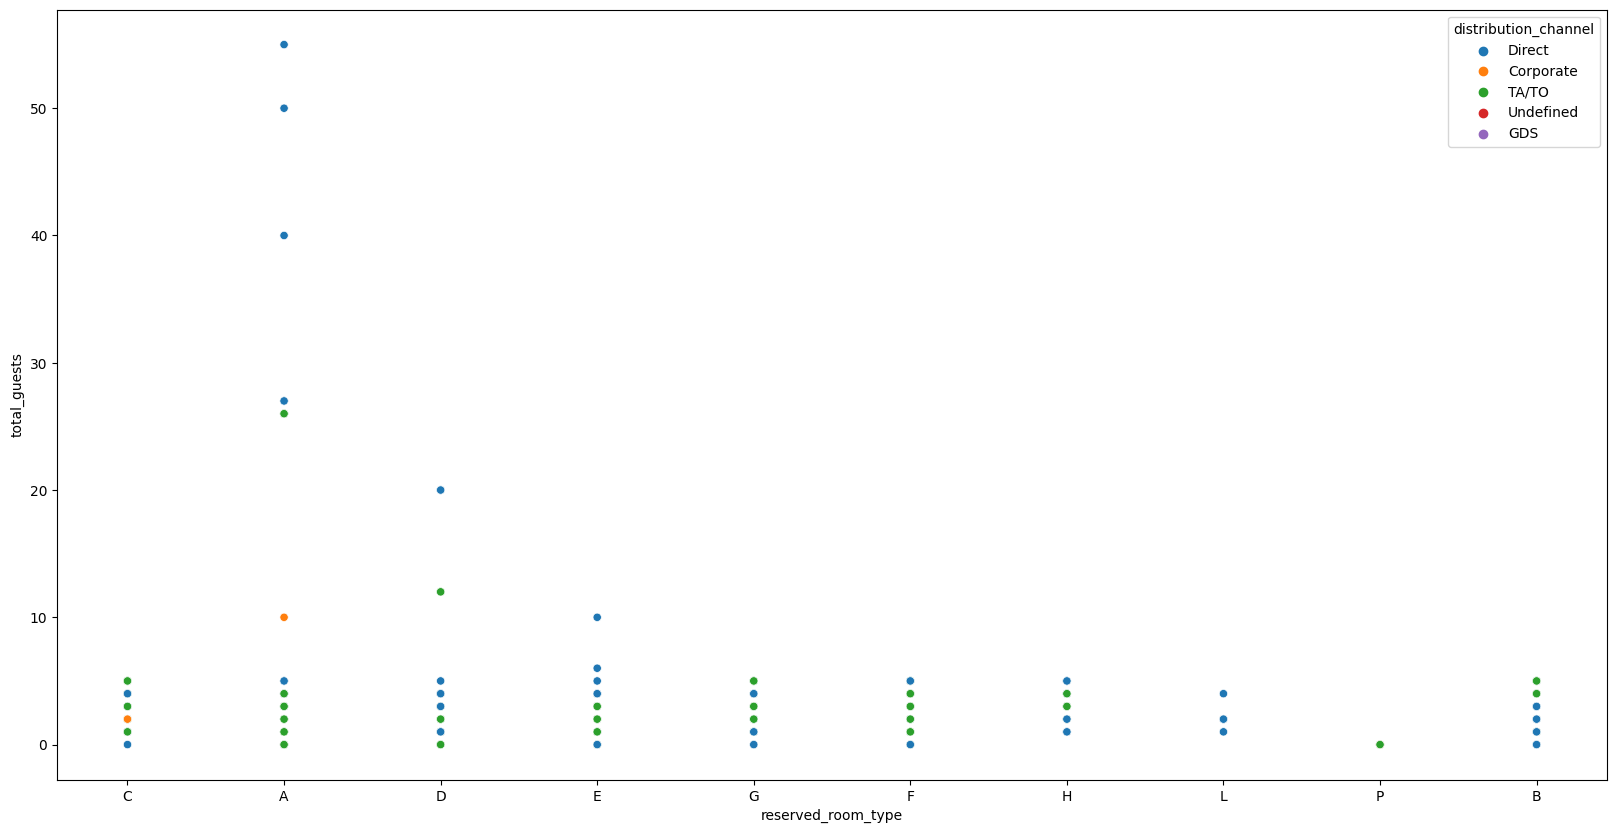

In [93]:
sns.scatterplot(data = hotel_df_new, x = 'reserved_room_type', y = 'total_guests', hue='distribution_channel')

#### <b> Inference 3:
##### <b> There is strong propensity for the A,D and E reserved_room_type.

#### <b> Also, for prescriptive analysis, P category can be evaluated when hotel get more years of data.

#### <b> Reserved_room_type A and B is the prefereed choice for "Corporate".

#### <b> Exploration 4:

##### <b> What is the monthly occupanycy of the hotel for the threee years of data that we have with us, i.e., for 2015, 2016 and 2017?

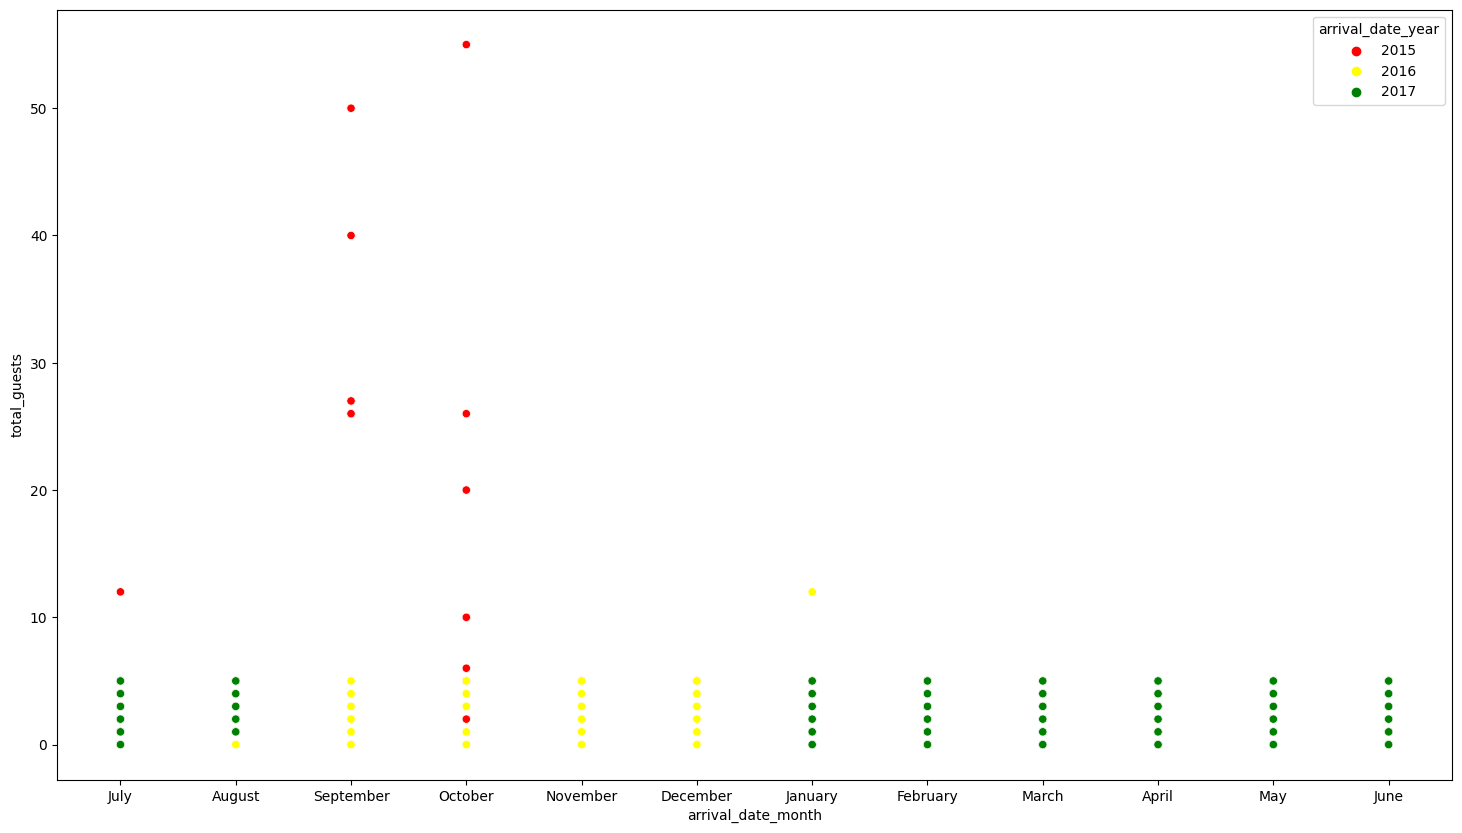

In [94]:
plt.figure(figsize=(18,10))
sns.scatterplot(data = hotel_df_new, x = 'arrival_date_month', y = 'total_guests', hue='arrival_date_year', palette = ['red', 'yellow', 'green'])

#### <b> Inference 4:

##### <b> (i) For 2015, maximum number of occupancy was there in the months of September and October (2 months).

##### <b> (ii) Further for 2016, maximum number of occupancy was there in the months of September, October, November and December (4 months), which was better than previous year, 2016.

##### <b> (iii) Then for the year 2017, good number of occupancy was there in the hotel from January to August. But for the months from Sept to Dec, there was a decline in occupancy of the Hotel.